<a href="https://colab.research.google.com/github/Bickmore664/newGITTest/blob/master/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Sample - Superstore.csv')
df.head()

,Profit Ratio,Category,City,Country/Region,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,16%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,$42,2,South,$262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$220,3,South,$732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47%,Office Supplies,Los Angeles,United States,Darrin Van Huff,0%,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,$7,2,West,$15,Corporate,6/16/2018,Second Class,California,Labels
3,-40%,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45%,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-$383,5,South,$958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11%,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20%,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,$3,2,South,$22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [2]:
df.shape

(9994, 21)

In [3]:
df.describe()

,Number of Records,Postal Code,Quantity
count,9994.0,9983.000000,9994.000000
mean,1.0,55245.233297,3.789574
std,0.0,32038.715955,2.225110
min,1.0,1040.000000,1.000000
25%,1.0,23223.000000,2.000000
50%,1.0,57103.000000,3.000000
75%,1.0,90008.000000,5.000000
max,1.0,99301.000000,14.000000


In [4]:
df.dtypes

Profit Ratio          object
Category              object
City                  object
Country/Region        object
Customer Name         object
Discount              object
Number of Records      int64
Order Date            object
Order ID              object
Postal Code          float64
Manufacturer          object
Product Name          object
Profit                object
Quantity               int64
Region                object
Sales                 object
Segment               object
Ship Date             object
Ship Mode             object
State                 object
Sub-Category          object
dtype: object

In [22]:
df.columns = df.columns.str.replace(' ','_')
df.columns = map(str.lower, df.columns)
df.head()

,profit_ratio,category,city,country/region,customer_name,discount,number_of_records,order_date,order_id,postal_code,manufacturer,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
0,16%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,$42,2,South,$262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$220,3,South,$732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47%,Office Supplies,Los Angeles,United States,Darrin Van Huff,0%,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,$7,2,West,$15,Corporate,6/16/2018,Second Class,California,Labels
3,-40%,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45%,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-$383,5,South,$958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11%,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20%,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,$3,2,South,$22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [23]:
import re
import string

In [27]:
def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

df['profit_ratio'] = df['profit_ratio'].apply(lambda x: remove_punct(x))
df['discount'] = df['discount'].apply(lambda x: remove_punct(x))
df['profit'] = df['profit'].apply(lambda x: remove_punct(x))
df['sales'] = df['sales'].apply(lambda x: remove_punct(x))
df.head()

,profit_ratio,category,city,country/region,customer_name,discount,number_of_records,order_date,order_id,postal_code,manufacturer,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
0,16,Furniture,Henderson,United States,Claire Gute,0,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,42,2,South,262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30,Furniture,Henderson,United States,Claire Gute,0,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",220,3,South,732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47,Office Supplies,Los Angeles,United States,Darrin Van Huff,0,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,7,2,West,15,Corporate,6/16/2018,Second Class,California,Labels
3,40,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,383,5,South,958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,3,2,South,22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [34]:
df['order_date'] = pd.to_datetime(df['order_date'], infer_datetime_format= True)
df['ship_date'] = pd.to_datetime(df['ship_date'], infer_datetime_format= True)
df.dtypes


profit_ratio                  int64
category                     object
city                         object
country/region               object
customer_name                object
discount                      int64
number_of_records             int64
order_date           datetime64[ns]
order_id                     object
postal_code                 float64
manufacturer                 object
product_name                 object
profit                        int64
quantity                      int64
region                       object
sales                         int64
segment                      object
ship_date            datetime64[ns]
ship_mode                    object
state                        object
sub-category                 object
dtype: object

In [39]:
df_pivot = df.pivot_table(index='state', values = ['sales', 'profit'], aggfunc='sum')
df_pivot.sort_values(by=['profit'], ascending=False)

,profit,sales
state,,
New York,84080,310914
California,83906,457731
Texas,47906,170187
Washington,34168,138656
Pennsylvania,27644,116522
Ohio,26538,78253
Illinois,26401,80162
Michigan,24458,76281
Virginia,18600,70641


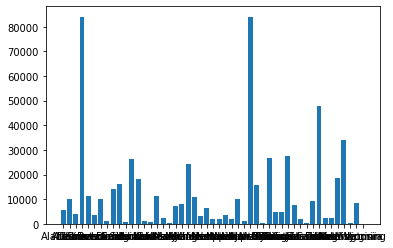

In [40]:
import matplotlib.pyplot as plt
df_plot = df_pivot.reset_index()
plt.bar(df_plot['state'], df_plot['profit'])
plt.show();